<a href="https://colab.research.google.com/github/timothykmulenga/profile_projects/blob/master/Image_Classification_F1__cars%5Bfastai%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import * # importing libraries
from fastai import *

In [0]:

folder = 'Ferrari'
file = '/content/drive/My Drive/Colab Notebooks/urls/ferrari.txt'

In [0]:
folder = 'Mclaren'
file = '/content/drive/My Drive/Colab Notebooks/urls/mclaren.txt'

In [0]:
folder = 'Mercedes'
file = '/content/drive/My Drive/Colab Notebooks/urls/mercedes.txt'

In [0]:
folder = 'Redbull'
file = '/content/drive/My Drive/Colab Notebooks/urls/redbull.txt'

In [0]:
folder = 'Renault'
file = '/content/drive/My Drive/Colab Notebooks/urls/renault.txt'

In [0]:
folder = 'Haas'
file ='/content/drive/My Drive/Colab Notebooks/urls/haas.txt'

In [0]:
folder = 'Willams'
file ='/content/drive/My Drive/Colab Notebooks/urls/williams.txt'

In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/Formula_1')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [27]:
#download_images(path/file, dest, max_pics=250)

In [0]:
classes = ["Ferrari", 'Mclaren','Mercedes', 'Redbull', 'Renault', 'Haas','Williams']

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=1400)

Ferrari


Mclaren


Mercedes


Redbull


Renault


Haas


Williams


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['Ferrari', 'Haas', 'Mclaren', 'Mercedes', 'Redbull', 'Renault', 'Willams']

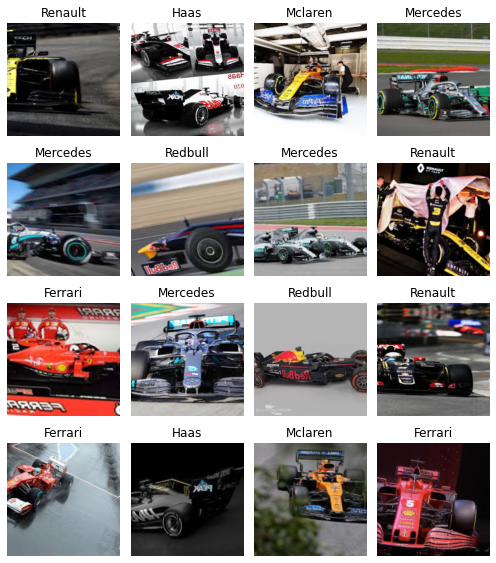

In [8]:
data.show_batch(rows=4, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Ferrari', 'Haas', 'Mclaren', 'Mercedes', 'Redbull', 'Renault', 'Willams'],
 7,
 883,
 220)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
import warnings
warnings.filterwarnings('ignore')

epoch,train_loss,valid_loss,accuracy,time
0,2.727399,1.305494,0.504545,01:29
1,1.741184,0.638355,0.777273,00:13
2,1.265920,0.604503,0.813636,00:13
3,0.987355,0.553958,0.822727,00:13
4,0.834350,0.510211,0.840909,00:13
5,0.706650,0.496156,0.845455,00:13


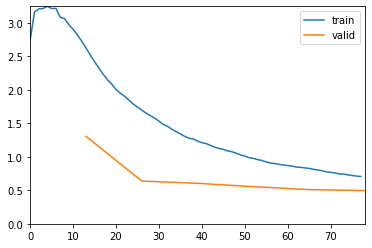

In [13]:
learn.fit_one_cycle(6)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


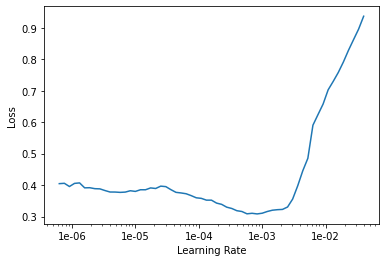

In [17]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.386058,0.449289,0.881818,00:13
1,0.307661,0.516117,0.854545,00:13
2,0.254418,0.424440,0.859091,00:13


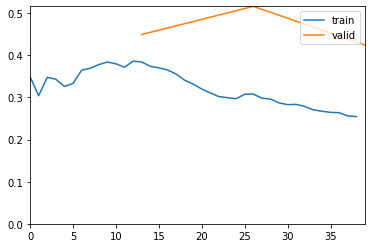

In [18]:
learn.fit_one_cycle(3, max_lr=slice(1e-05,1e-03))

In [0]:
learn.save('stage-2')

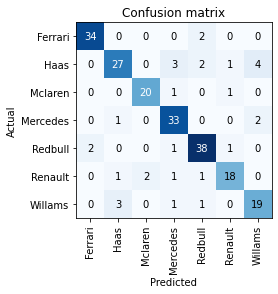

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()